# Изучение рынка заведений общественного питания Москвы

- Автор: Арамян Элен
- Дата: 04.01.2025

### Цели и задачи проекта

**Цель**: Провести исследовательский анализ данных рынка заведений общественного питания Москвы и выявить определенные закономерности и рекомендации, полезные для инвесторов при открытии заведния.

**Задачи**:
1) Загрузить данные и познакомиться с ними

2) Предобработать данные и нормализовать их.

3) Провести исследовательский анализ данных и продемонстрировать резульататы с помощью наглядной визуализации.

4) Выявить закономерности, подвести итоги и сформулировать рекомендации.

### Описание данных  
Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:
+ name — название заведения;
+ address — адрес заведения;
+ district — административный район, в котором находится заведение, например Центральный административный округ;
+ category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
+ hours — информация о днях и часах работы;
+ rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
+ chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
   0 — заведение не является сетевым;
   1 — заведение является сетевым.
+ seats — количество посадочных мест.

Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:
+ price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
+ avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
   «Средний счёт: 1000–1500 ₽»;
   «Цена чашки капучино: 130–220 ₽»;
   «Цена бокала пива: 400–600 ₽».
   и так далее;
+ middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
+ middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.


### Содержимое проекта 

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.


## 1. Загрузка данных и знакомство с ними 

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

     |████████████████████████████████| 686 kB 1.3 MB/s eta 0:00:01


In [2]:
# Выгружаем данные в переменные rest_info и rest_price
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

- Познакомьтесь с данными и изучите общую информацию о них.

**Изучим датафрейм rest_info**

In [3]:
# Выведем первые строки датасета 
rest_info.head(10)

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN
6,96ebceb1a09e4e3191133b9fe0379a64,Огни города,"бар,паб","Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45.0
7,0243288b78024af090b8e947842c969c,Mr. Уголёк,быстрое питание,"Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,0,45.0
8,36aeb0ffa69c48fdb0021549520deb10,Donna Maria,ресторан,"Москва, Дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",4.8,0,79.0
9,487167877eb04288bc90d4fa80646fc2,Готика,кафе,"Москва, Ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",4.3,0,65.0


In [4]:
# Изучим информацию о датафреймах подробнее
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


**Изучим датафрейм rest_info**

In [5]:
# Выведем первые строки датасета 
rest_price.head(10)

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN
5,96ebceb1a09e4e3191133b9fe0379a64,средние,Средний счёт:199 ₽,199.0,NaN
6,0243288b78024af090b8e947842c969c,средние,Средний счёт:200–300 ₽,250.0,NaN
7,36aeb0ffa69c48fdb0021549520deb10,средние,Средний счёт:от 500 ₽,500.0,NaN
8,487167877eb04288bc90d4fa80646fc2,средние,Средний счёт:1000–1200 ₽,1100.0,NaN
9,ac32978af97641bfacf996e7f5a50ee5,средние,Цена бокала пива:250–350 ₽,NaN,NaN


In [6]:
# Изучим информацию о датафреймах подробнее
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод 

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

**Анализ типов данных rest_info**

Датасет **rest_info** содержит 8406 строк и 9 стобцов, в которых представлена информация о заведениях общепита. Только в 2 столбцах встречаются пропуски. Данные соответствуют описанию, однако для точности можно переименовать столбец `hours` в `work_schedule`
    
**Типы данных и их корректность:**
 1) Строковые данные (object). Шесть столбцов имеют тип данных object:
+  `id`, `name`, `address`, `district`, `hours` имеют корректеый тип object 
+ `category` содержит инфо о категории заведения, это категориальные данные, в этом случае лушче использовать тип `category`

2) Числовые значения с плавающей запятой (float64) или целые числа (int64). Всего три столбца:
+ `rating` имеет корретный тип float64
+ `seats` нужно преобразовать в целочисленный тип int64, тк данные о кол-ве посадочных мест должны быть представлены целым числом
+ `chain` имеет корретный тип int64

    Однако для оптимального подбора данных можно понизить биты (`rating` - float32, `chain` - int8,  `seats` - int16)

Важно отметить, что названия столбцов написаны в едином стиле (snake case)

**Анализ типов данных rest_price**

Датасет **rest_price** содержит 4058 строк и 5 стобцов, в которых представлена информация о заведениях общепита. В 4 столбцах встречаются пропуски. Данные соответствуют описанию, однако для точности можно переименовать столбец `price` в `price_category`
    
**Типы данных и их корректность:**
 1) Строковые данные (object). Три столбца имеют тип данных object:
 + `id`, `avg_bill` имеют корректеый тип object
 + `price` хранит категориальные данные, в этом случае лушче использовать тип `category`
 + `middle_avg_bill` и `middle_coffee_cup` имеет корретный тип float64
 
 2) Числовые значения с плавающей запятой (float64). Всего два столбца:
 + `middle_avg_bill` и `middle_coffee_cup` имеют корректный тип, однако для оптимизации данных также можно понизить биты на float32
 
 
 В этом датафрейме названия столбцов также в едином стиле (snake case)

### Подготовка единого датафрейма 

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [70]:
# Объединим оба датафрейма с помощью left 
df = rest_info.merge(rest_price, on='id', how='left')
df.head(7)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN,средние,NaN,NaN,NaN
6,96ebceb1a09e4e3191133b9fe0379a64,Огни города,"бар,паб","Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45.0,средние,Средний счёт:199 ₽,199.0,NaN


In [8]:
# Проверка на количество строк нового датасета:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных  

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование. 

In [9]:
# Проверим инфо нового объединенного датафрейма:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Как и было описано выше, необходимо изменить тип данных некоторых столбцов

In [10]:
# Меняем типы данных:
df['category'] = df['category'].astype('category')
df['price'] = df['price'].astype('category')

In [11]:
# Для удобства переименуем некоторые столбцы:
df = df.rename(columns={'price' : 'price_category',
                       'hours' : 'work_schedule'})

In [12]:
# Для удобства также сократим "административный округ" на АО:
df['district'] = df['district'].str.replace('административный округ', 'АО')

In [13]:
# Проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   object  
 5   work_schedule      7870 non-null   object  
 6   rating             8406 non-null   float64 
 7   chain              8406 non-null   int64   
 8   seats              4795 non-null   float64 
 9   price_category     3315 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float64 
 12  middle_coffee_cup  535 non-null    float64 
dtypes: category(2), float64(4), int64(1), object(6)
memory usage: 805.0+ KB


Понижать биты не обязательно, тк данных не так много, можно оставить все как есть

А для преобразования `seats` в целочисленный тип нужно для начала избавиться от пропусков, что и сделаем ниже

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть. 

In [14]:
# Проверим абсолютное количество пропусков в каждом столбце
df.isna().sum().sort_values(ascending=False)

middle_coffee_cup    7871
middle_avg_bill      5257
price_category       5091
avg_bill             4590
seats                3611
work_schedule         536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
dtype: int64

In [15]:
# Проверим относительное количество пропусков в процентах
round((df.isna().sum() / len(df)  * 100),2).sort_values(ascending=False)

middle_coffee_cup    93.64
middle_avg_bill      62.54
price_category       60.56
avg_bill             54.60
seats                42.96
work_schedule         6.38
id                    0.00
name                  0.00
category              0.00
address               0.00
district              0.00
rating                0.00
chain                 0.00
dtype: float64

Итак, у нас есть пропуски в 6 столбцах:
+ `work_schedule` содержит инфо о графике работы, пропуски скорее всего просто никем не заполнены, эти данные просто трогать не будем
+ `seats` содержит инфо о кол-во посадочных мест, данные также скорее всего просто не внесли, заменим на "заглушку", к примеру пусть будет "-1"
+ `price_category` менять также не будем (хотя по логике можно было бы поступить следующим образом - если в столбце `middle_avg_bill` была бы какая то информация, то можно было бы заполнить пропуски исходя из значений, но скорее всего это не совсем точно и слишком муторно для проекта, поэтому просто оставим пропуски)
+ `avg_bill` также не будем трогать, тут ничем не заполнить пропуски
+ `middle_avg_bill` часть пропусков связана с тем, что нет расчета с подстроки «Средний счёт», а часть пропусков с тем, что просто нет данных по некоторым заведениям, поэтому тут также заполнять ничего не будем
+ `middle_coffee_cup` аналогично `middle_avg_bill`, заполнять не будем

In [16]:
# Заполним пропуски в столбце `seats`:
df['seats'] = df['seats'].fillna(-1)

In [17]:
# А теперь поменяем тип на корректный:
df['seats'] = df['seats'].astype('int16')

In [18]:
# Проверка:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   object  
 5   work_schedule      7870 non-null   object  
 6   rating             8406 non-null   float64 
 7   chain              8406 non-null   int64   
 8   seats              8406 non-null   int16   
 9   price_category     3315 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float64 
 12  middle_coffee_cup  535 non-null    float64 
dtypes: category(2), float64(3), int16(1), int64(1), object(6)
memory usage: 755.8+ KB


- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения. 

In [19]:
# Проверим, есть ли явные дубликаты в датафрейме:
df.duplicated().sum()

0

In [20]:
# И проверим дубли в двух столбцах
df.duplicated(subset=['name', 'address']).sum()

0

На этом этапе явных дубликатов нет, однако стоит более детально изучить столбцы датафрейма

In [21]:
# Запустим цикл для вывода уникальных значений в некоторых столбцах:
for column in ['category', 'rating', 'chain', 'price_category']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print

Уникальные значения в столбце category:
['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня', 'пиццерия', 'ресторан', 'столовая']
Categories (8, object): ['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня', 'пиццерия', 'ресторан', 'столовая']
Уникальные значения в столбце rating:
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5. ]
Уникальные значения в столбце chain:
[0 1]
Уникальные значения в столбце price_category:
['высокие', 'выше среднего', 'низкие', 'средние', NaN]
Categories (4, object): ['высокие', 'выше среднего', 'низкие', 'средние']


In [22]:
# Посмотрим на все уникальные значения столбца name
for value in df['name'].sort_values().unique():
    print(value)

#КешбэкКафе
+39 Pizzeria Mozzarella bar
1 Этаж
1-я Креветочная
10 Идеальных Пицц
1001 Ночь
100ловая
100лоффка
13
13 Chef doner
15 Kitchen+Bar
15-й Шар
16 Июня
16 Тонн
18 Грамм
1901 Comfort Food Zone
1у
2 Типа
2-й Этаж
2046
21 Век
22 Акра Кофе&Хлеб
2U-Ту-Ю
3 Ступени
351 Bar
4 Сезона
4.2. Bar
4/1 Restaurant
42 Coffee Shop
47
495
4friends Coffee
4tuna Cafe&Grill
5 Stars Coffee
55.709201, 37.392257
6 Am Bread Kitchen
6 Рукопожатий
69 раков
7 Сэндвичей
7 элемент
7/12
8 Oz
8 Вафель
8 Зёрен
8 Пончиков
800°с Contemporary Steak
8bit Pizza
9 Bar Coffe
9 Bar Coffee
9 Зёрен
A-cafe
ABC Coffee Roasters
ABC coffee roasters
Acai Family
Accent
Adam's Chicken
Adria Mare
Ahava
Air Coffee
Al Halal
Al33 Пиццерия бар Боттега
All Day
Alma
Alternative coffee
Aly’s Poke
Amande
Amarena
Americano Black Coffee & Food
Amg cafe
Ami Chaise
Amore Grande
Amsterdam Bar
Andy Coffee
Angel Cakes City
Angel Cakes Patriki
Ann Joy
Anri Bakery
Antalya
Anvil Cafe
Aq Kitchen
Aquarium
Arabix
Arch 1908
Archie
Arcus Bar And Food
A

In [23]:
# Посмотрим на все уникальные значения столбца address
for value in df['address'].sort_values().unique():
    print(value)

Москва, 1-й Автозаводский проезд, 5
Москва, 1-й Балтийский переулок, 3/25
Москва, 1-й Варшавский проезд, 1Ас9
Москва, 1-й Вешняковский проезд, 15
Москва, 1-й Волоколамский проезд, 10
Москва, 1-й Волоколамский проезд, 10, стр. 1
Москва, 1-й Голутвинский переулок, 6
Москва, 1-й Грайвороновский проезд, 2А
Москва, 1-й Дербеневский переулок, 5
Москва, 1-й Дорожный проезд, 1, корп. 2
Москва, 1-й Дорожный проезд, 1к2
Москва, 1-й Дорожный проезд, 4, стр. 1
Москва, 1-й Земельный переулок, 1
Москва, 1-й Капотнинский проезд, 12, стр. 1
Москва, 1-й Кирпичный переулок, 2, стр. 2
Москва, 1-й Колобовский переулок, 17с1
Москва, 1-й Котляковский переулок, 3
Москва, 1-й Красногвардейский проезд, 15
Москва, 1-й Красногвардейский проезд, 19
Москва, 1-й Красногвардейский проезд, 21с2
Москва, 1-й Красногвардейский проезд, 22, стр. 2
Москва, 1-й Курьяновский проезд, 1с1/20
Москва, 1-й Лучевой просек, 1
Москва, 1-й Лучевой просек, 9
Москва, 1-й Магистральный тупик, 5
Москва, 1-й Магистральный тупик, 5А
Москва

In [24]:
# Нормализуем столбец с названиями заведений и адресом (приведем к нижнему регистру)
df['name'] = df['name'].str.lower()
df['address'] = df['address'].str.lower()

In [25]:
df.duplicated(subset=['name', 'address']).sum()

4

In [26]:
# Удалим пробелы и другие знаки в начале и конце строки
df['name'] = df['name'].str.strip()
df['address'] = df['address'].str.strip()

In [27]:
# Удалим задубленные пробелы
df['name'] = df['name'].str.replace('  ', ' ')
df['address'] = df['address'].str.replace('  ', ' ')

In [28]:
df.duplicated(subset=['name', 'address']).sum()

4

Итого у нас 4 дубликата (смотрим именно по столбцам название и адрес, тк очевидно если они совпадают, то строки - дубли), удалим их

In [29]:
# Сохраняем кол-во строк до удаления
df_lines = df.shape[0]

# Удаляем дубликаты:
df = df.drop_duplicates(subset =['name', 'address']) 

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае. 

In [30]:
# Посмотрим на значения графиков работы заведений
for value in df['work_schedule'].sort_values().unique():
    print(value)

Нет информации
вт 08:30–17:00; ср,чт 12:00–20:30; пт 08:30–17:00; сб 09:00–16:30
вт 13:00–21:00; ср 11:00–20:00; чт 13:00–21:00; пт-вс 11:00–20:00
вт,чт 10:00–18:00
вт,чт,пт,сб,вс 08:00–23:00
вт-вс 09:00–19:00
вт-вс 09:00–21:00
вт-вс 10:00–18:00
вт-вс 10:00–20:00
вт-вс 10:00–21:00
вт-вс 10:00–22:00
вт-вс 10:30–22:00
вт-вс 10:45–21:00
вт-вс 11:00–20:00
вт-вс 11:00–23:00
вт-вс 12:00–00:00
вт-вс 12:00–20:00
вт-вс 12:00–21:00
вт-вс 12:00–23:00
вт-вс 12:00–23:00, перерыв 17:00–18:00
вт-вс 14:00–22:00
вт-вс 17:00–23:00
вт-вс 19:00–06:00
вт-вс круглосуточно
вт-пт 09:00–22:00; сб,вс 10:00–22:00
вт-пт 12:00–20:00; сб,вс 12:00–22:00
вт-сб 09:00–18:00
вт-сб 09:00–21:00
вт-сб 12:00–21:00
вт-сб 17:00–00:00
вт-сб 20:00–06:00
вт-чт 10:00–20:30; пт,сб 10:00–21:30; вс 10:00–20:30
вт-чт 12:00–00:00; пт,сб 12:00–05:00; вс 12:00–00:00
вт-чт 12:00–23:00; пт 12:00–02:00; сб 15:00–02:00
вт-чт 14:00–00:00; пт,сб 14:00–03:00; вс 14:00–00:00
вт-чт 15:00–00:00; пт,сб 17:00–05:00
вт-чт 17:00–00:00; пт 17:00–03:00

Итак, видно, что график 24/7 записан как **"ежедневно, круглосуточно"**

In [31]:
# Добавим новый столбец is_24_7
df['is_24_7'] = df['work_schedule'].str.contains('ежедневно, круглосуточно')

In [32]:
# Проверка:
df.sample(7)

,id,name,category,address,district,work_schedule,rating,chain,seats,price_category,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
486,db294e1293de42639e6f366f50faeca3,додо пицца,пиццерия,"москва, головинское шоссе, 1а",Северный АО,"ежедневно, 08:00–22:00",4.3,1,-1,NaN,Средний счёт:324 ₽,324.0,NaN,False
5137,bd225216d97d489d97e0da160b8df5ab,knockout coffee,кофейня,"москва, летниковская улица, 4, стр. 5",Центральный АО,пн-пт 08:00–19:00; сб 09:00–19:00,4.3,0,45,NaN,Цена чашки капучино:150–220 ₽,NaN,185.0,False
3314,521724fad4d64bdc839c38e90e57a815,карамель,кафе,"москва, проспект маршала жукова, 39, корп. 1",Северо-Западный АО,"ежедневно, 09:00–21:00",3.8,0,130,NaN,NaN,NaN,NaN,False
2663,2b113cc1dd5d45ff915f8c81043594cc,роко бэй — мох и кофе,кофейня,"москва, восточный административный округ, райо...",Восточный АО,"ежедневно, 08:00–20:00",4.7,1,-1,NaN,NaN,NaN,NaN,False
7997,fde618e5228a47e8b5cdb9e3a8f3c4aa,огни севера,кафе,"москва, улица космонавта волкова, 10",Северный АО,"ежедневно, 10:00–21:00",4.4,0,-1,NaN,NaN,NaN,NaN,False
7634,4e14c6bfe1d549a383cf19c30cc5e3b0,чертаново,кафе,"москва, чертановская улица, 32, стр. 3",Южный АО,"ежедневно, 09:00–20:00",4.4,0,240,NaN,NaN,NaN,NaN,False
2694,ba41f7a021434889835f8608358095d9,bb grill,"бар,паб","москва, семёновская площадь, 1",Восточный АО,"ежедневно, 12:00–23:00",4.6,0,100,высокие,Средний счёт:1500–2500 ₽,2000.0,NaN,False


---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

В процессе предобработки были заменены некоторые типы данных и названия 2 столбцов (`seats` теперь имеет корректный тип int, `category` и `price` тип category, и столбцы были переименованы: `price` -> `price_category`, `hours` -> `work_schedule`)

Доля пропущенных значений во многих столбцах датафрейма велика - около 50% в 4 столбцах и более 90% в одном из столбцов,  однако эти пропуски обрабатывать не нужно (кроме столбца seats, где была использована "заглушка") и заполнять какими-то средним и значениями также не стоит

Также путем нормализации строк, удаления пробелов и лишних знаков было выявлено 4 дубликата - они были удалены. Их доля совсем мала (ниже см процент удаленных данных)

In [33]:
# Сохраняем кол-во удаленных строк
deleted_lines = df_lines - df.shape[0]

# Сохраняем процент удалённых строк
deleted_percent = round(deleted_lines / df_lines * 100, 2)

# Выводим результат
print(f'Удалено всего {deleted_lines} cтроки или {deleted_percent}% строк')

Удалено всего 4 cтроки или 0.05% строк


## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией. 

<AxesSubplot:title={'center':'Количество заведений общепита по категориям'}, xlabel='Категория', ylabel='Количество заведений'>

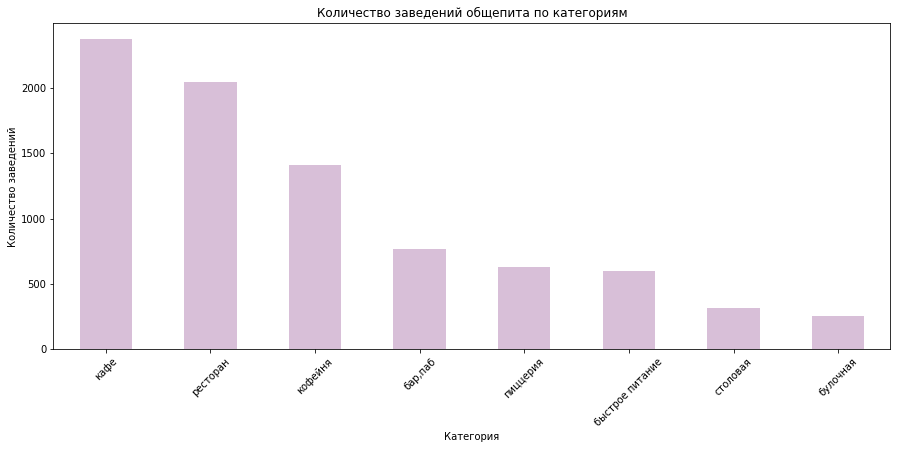

In [34]:
df['category'].value_counts().plot(kind='bar',
                                  title='Количество заведений общепита по категориям',
                                  color='thistle',
                                  xlabel='Категория',
                                  ylabel='Количество заведений',
                                  rot=45,
                                  figsize=(15, 6))

In [35]:
df['category'].value_counts()

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

Больше всего заведений - это кафе, которых больше 2300 заведений, рестораны (более 2000) и кофейни (около 1400). По остальным категориям количество заведений сильно меньше - в два, в три, а то в и больше раз, как например булочных или столовых всего лишь около 300 и 250 соответственно.

---

### Задача 2 

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями. 

<AxesSubplot:title={'center':'Количество заведений в административных округах Москвы'}, ylabel='Количество заведений'>

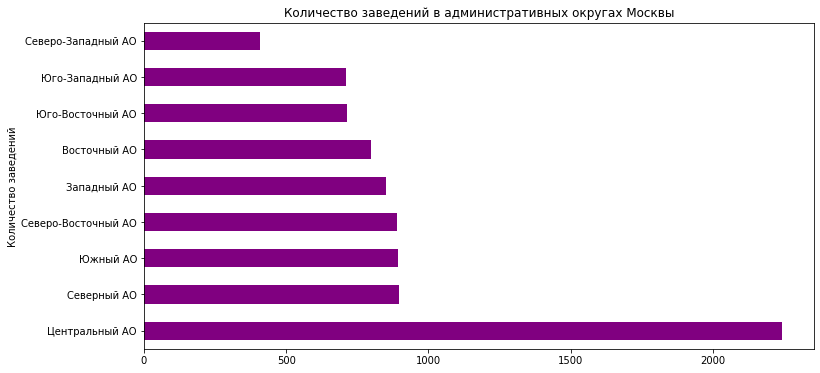

In [36]:
# Исследуем распределение количества заведений по административным районам Москвы
df['district'].value_counts().plot(kind='barh',
                                  color='purple',
                                  title='Количество заведений в административных округах Москвы',
                                  xlabel='Количество заведений',
                                  figsize=(12, 6)
                                  )

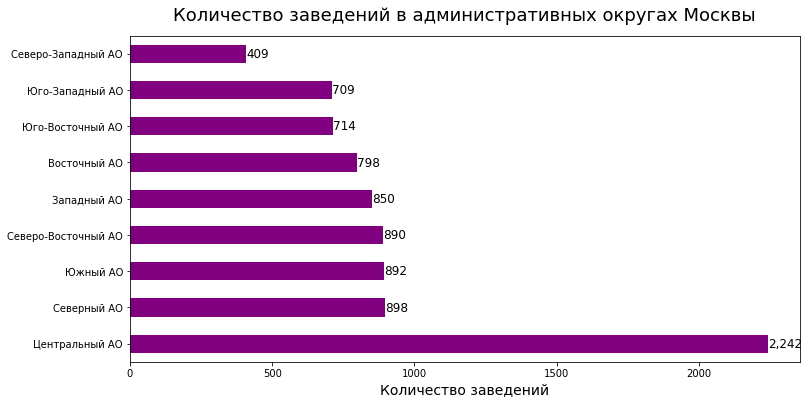

In [37]:
# Визуализируем 2.0

ax = df['district'].value_counts().plot(kind='barh',
                                        color='purple',
                                        figsize=(12, 6))

ax.set_title('Количество заведений в административных округах Москвы', fontsize=18, pad=15)
ax.set_xlabel('Количество заведений', fontsize=14)

for bar in ax.patches:
    ax.annotate(f'{bar.get_width():,}',
                xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                ha='left', va='center', fontsize=12)
plt.show()


Видим, что наибольшее количество заведений сосредоточено в Центральном административном округе

In [38]:
# Отфильтруем датафрейм по 
central = df.loc[df['district'] == 'Центральный АО']

<AxesSubplot:title={'center':'Количество заведений по категориям в ЦАО Москвы'}, xlabel='Категория', ylabel='Количество заведений'>

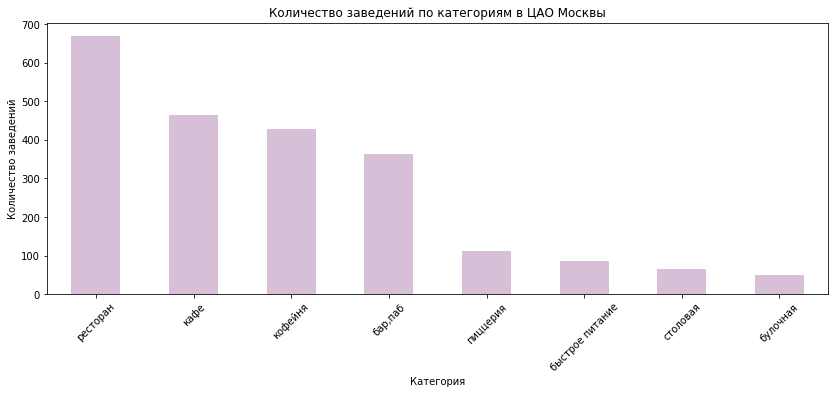

In [39]:
# # Исследуем  распределение заведений каждой категории в ЦАО Москвы
central['category'].value_counts().plot(kind='bar',
                                       color='thistle',
                                       title='Количество заведений по категориям в ЦАО Москвы',
                                       xlabel='Категория',
                                       ylabel='Количество заведений',
                                       rot=45,
                                       figsize=(14, 5)
                                       )

Аналогично и в ЦАО самые распространненные категории общепита - рестораны, кафе и кофейни. Однако в данном округе на первом месте рестораны, это неудивительно, поскольку в центре столицы достаток выше и траты больше

---

### Задача 3 

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации. 

<AxesSubplot:title={'center':'Соотношение сетевых и несетвых заведений'}>

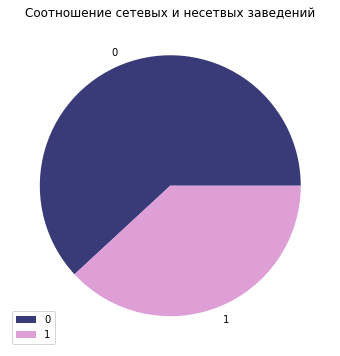

In [40]:
# Изучим соотношение сетевых и несетевых заведений в целом 
df['chain'].value_counts().plot(kind='pie',   
                              rot=0,
                              title='Соотношение сетевых и несетвых заведений',
                              ylabel='',
                              legend=True,
                              colormap='tab20b',
                              figsize=(6, 6))

Из графика видно, что несетевых заведений больше почти в 2 раза

<AxesSubplot:title={'center':'Соотношение сетевых и несетвых заведений в разрезе категорий'}, xlabel='Категория', ylabel='Количество заведений'>

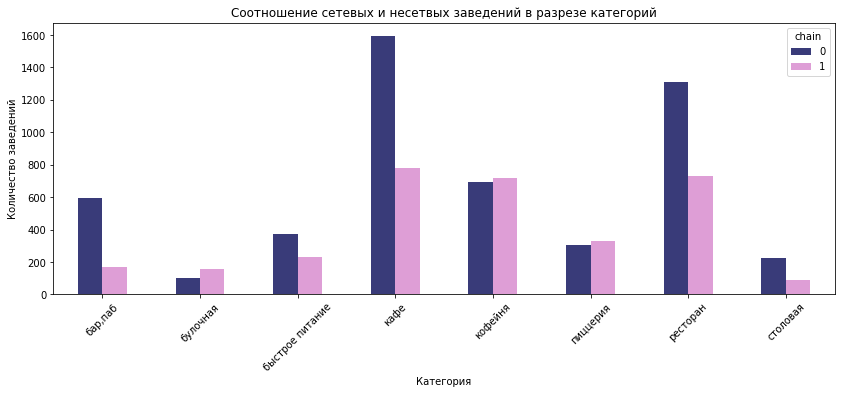

In [41]:
# Изучим соотношение сетевых и несетевых заведений в разрезе категорий
visual = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)
visual.plot(kind='bar',
           title='Соотношение сетевых и несетвых заведений в разрезе категорий',
           ylabel='Количество заведений',
           xlabel='Категория',
           legend=True,
           colormap='tab20b',
           figsize=(14, 5),
           rot=45)

Больше всего как несетевых так и несетевых заведений - это кафе, далее идут рестораны, но если смотреть процентное соотношение кол-ва заведений и являются ли они сетевыми/несетевыми, то в ресторанах процент с сетевыми заведениями будет больше.

In [42]:
visual.reset_index()
visual['percantage']=round((visual[1] / (visual[0] + visual[1])  * 100),2)
visual = visual.sort_values(by='percantage', ascending=False)
display(visual)

chain,0,1,percantage
category,,,
булочная,99,157,61.33
пиццерия,303,330,52.13
кофейня,693,720,50.96
быстрое питание,371,232,38.47
ресторан,1313,729,35.70
кафе,1597,779,32.79
столовая,227,88,27.94
"бар,паб",596,168,21.99


<AxesSubplot:title={'center':'Какие категории заведений чаще являются сетевыми'}, xlabel='Категория', ylabel='Процент сетевых заведений'>

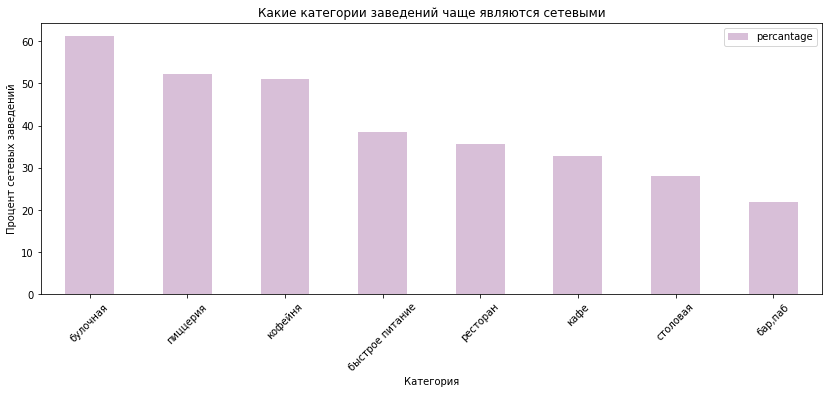

In [43]:
visual.plot(kind='bar',
            y='percantage',
           title='Какие категории заведений чаще являются сетевыми',
           ylabel='Процент сетевых заведений',
           xlabel='Категория',
           color='thistle',
           figsize=(14, 5),
           rot=45)

Чаще всего сетевыми являются булочные (около 60% от общего числа булочных), далее идут пиццерии и кофейни (около 50%), а у остальных категорий процент невелик - меньше 50%

---

### Задача 4 

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями. 


In [44]:
# Для корректного анализа сначала отфильтруем датасет, отсеив значения-заглушки (-1)
df_1=df.loc[df['seats'] != -1]

In [45]:
# Выведем статистику:
df_1['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

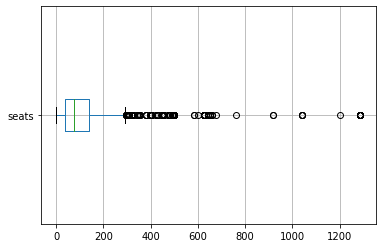

In [46]:
# Визуализируем разбросы используя "ящик с усиками"
boxplot = df_1.boxplot(column='seats',
                    vert=False)

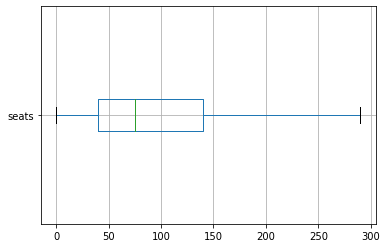

In [47]:
boxplot = df_1.boxplot(column='seats',
                    vert=False,
                    showfliers=False)

In [48]:
# Пройдемся по уникальным значениям столбца
for value in df_1['seats'].sort_values().unique():
    print(value)

0
1
2
3
4
5
6
7
8
9
10
12
13
14
15
16
17
18
19
20
21
22
24
25
26
27
28
29
30
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
58
60
61
62
63
64
65
66
67
68
69
70
72
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
90
92
93
94
95
96
97
98
99
100
102
104
105
106
107
108
110
112
113
114
115
116
118
120
122
124
125
126
127
128
130
131
132
133
135
138
140
141
143
144
145
146
147
148
150
151
154
155
157
158
159
160
161
164
165
166
167
168
170
173
174
175
176
178
180
184
185
187
188
189
190
192
195
198
200
202
206
208
210
212
214
215
217
220
225
226
228
229
230
232
236
239
240
245
246
247
250
252
266
268
270
273
275
276
280
286
287
290
295
300
305
306
307
308
310
320
326
330
343
350
356
380
398
400
420
428
430
450
455
478
480
481
491
495
500
585
600
625
644
650
660
675
760
920
1040
1200
1288


Видим, что распределение неравномерное - очень много выбросов в большую сторону, возможно часть из них - аномальные значения, а возможно действительно есть такие заведения (это можно проверить и подчистить если что). Также можно заметить, что минимальное значение - 0, а это не может быть действитетльностью, точно так же как и 1, 2, 3.... Это очень маленькое количество посадочных мест - скорее всего это аномалия (тоже можно проверить)

In [49]:
# Исследуем среднее кол-во мест для заведений в разрезе категорий
df_1.groupby('category')['seats'].median().sort_values(ascending=False)

category
ресторан           86.0
бар,паб            82.0
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float64

<AxesSubplot:title={'center':'Типичное количество мест в заведениях в разрезе категорий'}, xlabel='category', ylabel='Количество посадочных мест'>

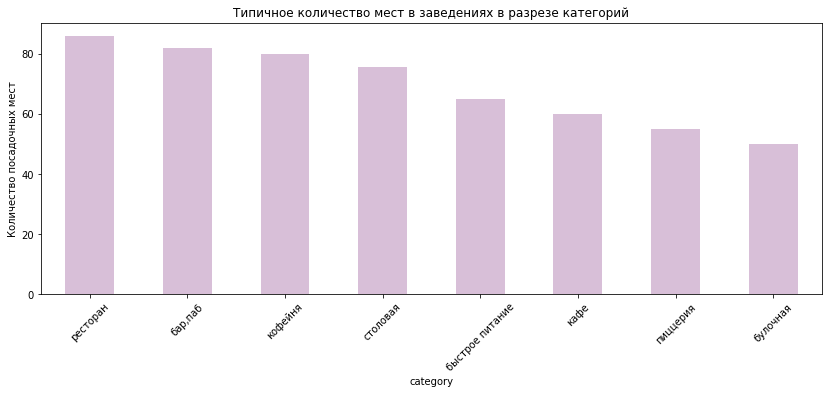

In [50]:
# Визуализируем среднее кол-во мест для заведений в разрезе категорий
df_1.groupby('category')['seats'].median().sort_values(ascending=False).plot(kind='bar',
                                               title='Типичное количество мест в заведениях в разрезе категорий',
                                             rot=45,
                                             color='thistle',
                                             ylabel='Количество посадочных мест',
                                             figsize=(14, 5))

---

### Задача 5 

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита? 

Text(0.5, 0, 'Оценка')

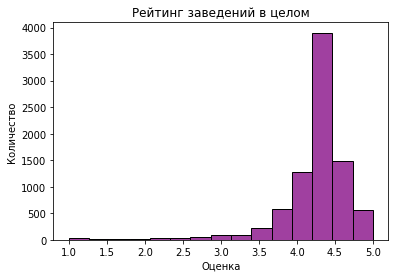

In [51]:
sns.histplot(data=df, x='rating',  bins=15, color='purple')
plt.title('Рейтинг заведений в целом')
plt.ylabel('Количество')
plt.xlabel('Оценка')

<AxesSubplot:title={'center':'Усредненный рейтинг заведений по категориям'}, xlabel='Категория', ylabel='Оценка'>

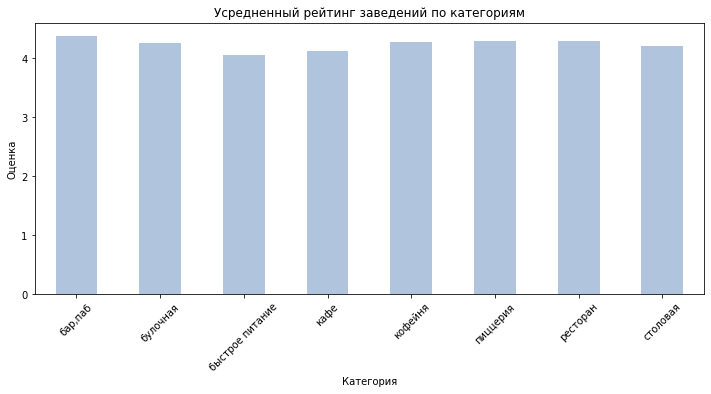

In [52]:
df.groupby('category')['rating'].mean().plot(kind='bar',
                                            title='Усредненный рейтинг заведений по категориям',
                                             rot=45,
                                             color='lightsteelblue',
                                             ylabel='Оценка',
                                             xlabel='Категория',
                                             figsize=(12,5))

Из двух графиков видно, что средний рейтинг заведений около 4,5. Причем вне зависимости от категории общепита рейтинги все почти одинаковые.

---

### Задача 6 

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её. 

In [53]:
# Выбираем переменные для анализа корреляции
phiks = ['rating', 'category', 'district', 'chain', 'seats', 'price_category', 'is_24_7']

intervals = ['rating', 'chain', 'seats']

# Выводим матрицу phi_k
phik_matrix = df[phiks].phik_matrix(interval_cols=intervals)
display(phik_matrix)

,rating,category,district,chain,seats,price_category,is_24_7
rating,1.000000,0.189716,0.200761,0.107833,0.000000,0.220295,0.174880
category,0.189716,1.000000,0.174584,0.266000,0.059657,0.566933,0.266320
district,0.200761,0.174584,1.000000,0.064473,0.276245,0.202787,0.091168
chain,0.107833,0.266000,0.064473,1.000000,0.054989,0.218211,0.032154
seats,0.000000,0.059657,0.276245,0.054989,1.000000,0.064555,0.036451
price_category,0.220295,0.566933,0.202787,0.218211,0.064555,1.000000,0.084262
is_24_7,0.174880,0.266320,0.091168,0.032154,0.036451,0.084262,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'rating'),
  Text(1.5, 0, 'category'),
  Text(2.5, 0, 'district'),
  Text(3.5, 0, 'chain'),
  Text(4.5, 0, 'seats'),
  Text(5.5, 0, 'price_category'),
  Text(6.5, 0, 'is_24_7')])

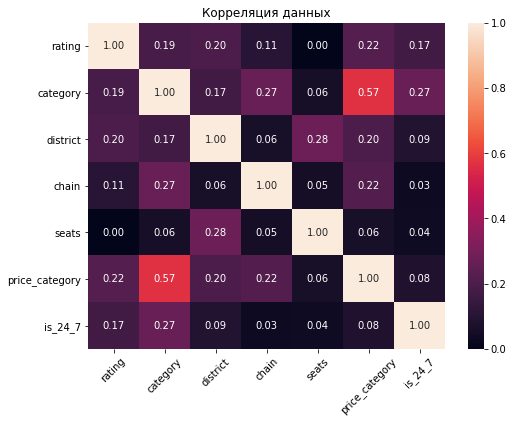

In [54]:
# Визуализируем матрицу в тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(phik_matrix, fmt='.2f', annot=True)
plt.title('Корреляция данных')
plt.xticks(rotation=45)

Из тепловой карты видно, что рейтинг почти не коррелирует ни с одним из данных. Это значит, что оценка людей не зависит от других показателей.Однако проверим связь рейтинга и ценовой категории.  Получим, что средний рейтинг примерно одинаково выше 4 баллов у заведений любой ценовой категории

<AxesSubplot:title={'center':'Средний рейтинг в зависимости от ценовой категории заведения'}, xlabel='Ценовая категория заведения', ylabel='Средний рейтинг'>

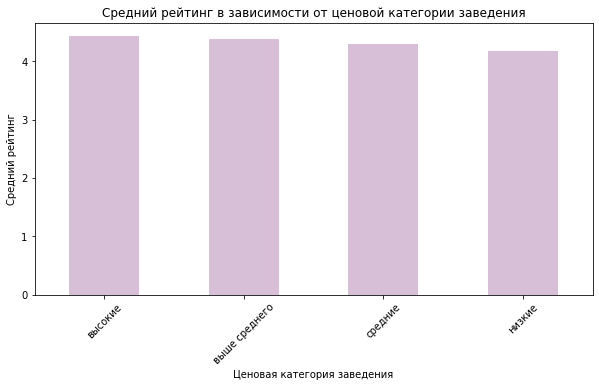

In [55]:
# Проверяем связь:
df.groupby('price_category')['rating'].mean().sort_values(ascending=False).plot(kind='bar',
                                               title='Средний рейтинг в зависимости от ценовой категории заведения',
                                             rot=45,
                                             color='thistle',
                                             ylabel='Средний рейтинг',
                                             xlabel='Ценовая категория заведения',
                                             figsize=(10, 5))

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [56]:
# Отфильтруем датасет от несетевых заведений
df_chain = df.loc[df['chain'] == 1]

In [57]:
# Сгруппируем заведения по названию и категории, подсчитав их количество и средний рейтинг
groupped_df = df_chain.groupby(['category', 'name'])['rating'].agg(['count', 'mean'])
display(groupped_df)

count  mean
category name                          
бар,паб  1-я креветочная        0   NaN
         10 идеальных пицц      0   NaN
         18 грамм               0   NaN
         4 сезона               0   NaN
         7 сэндвичей            0   NaN
...                           ...   ...
столовая яндекс лавка           0   NaN
         яндекс.лавка           0   NaN
         японская кухня         0   NaN
         ё-ланч                 2   4.0
         ёрш                    0   NaN

[5976 rows x 2 columns]

In [58]:
# Отсортируем топ-15 популярных сетей
sorted_df = groupped_df.sort_values(by='count', ascending=False)
sorted_df = sorted_df.reset_index()
df_2 = sorted_df.head(15)
display(df_2)

,category,name,count,mean
0,кофейня,шоколадница,119,4.178151
1,пиццерия,домино'с пицца,76,4.169737
2,пиццерия,додо пицца,74,4.286486
3,кофейня,one price coffee,71,4.064789
4,ресторан,яндекс лавка,69,3.872464
5,кофейня,cofix,65,4.075385
6,ресторан,prime,49,4.114286
7,кофейня,кофепорт,42,4.147619
8,кафе,кулинарная лавка братьев караваевых,39,4.394872
9,ресторан,теремок,36,4.105556


<AxesSubplot:title={'center':'ТОП-15 популярных сетей в Москве'}>

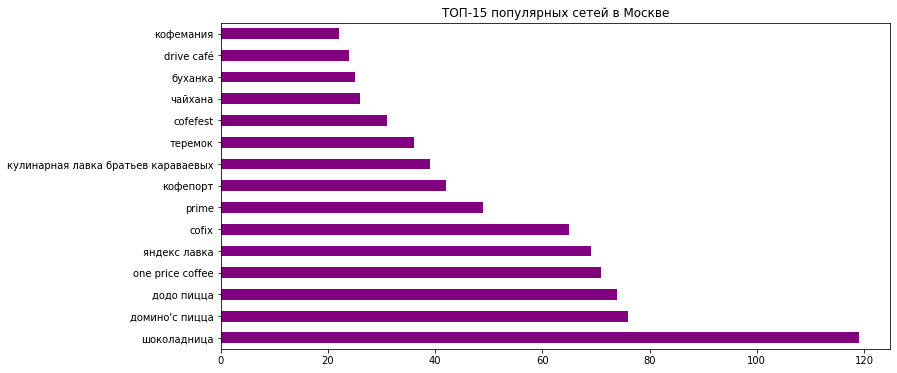

In [59]:
# Визуализируем данные - построим график топ-15 заведений
df_2.plot(kind='barh',
         x = 'name',
         y='count',
         title='ТОП-15 популярных сетей в Москве',
         color='purple',
         legend=False,
         xlabel='',
         ylabel='Количество заведений',
         figsize=(12, 6))

<AxesSubplot:title={'center':'Средний рейтинг популярных заведений Москвы'}>

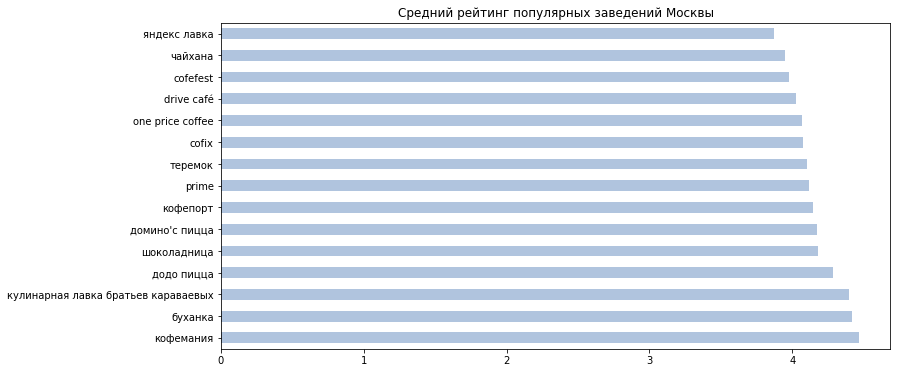

In [60]:
# Визуализируем данные - построим график о рейтинге заведений:
df_2 = df_2.sort_values(by='mean', ascending=False)
df_2.plot(kind='barh',
         x = 'name',
         y='mean',
         title='Средний рейтинг популярных заведений Москвы',
         color='lightsteelblue',
         legend=False,
         xlabel='',
         ylabel='Средний рейтинг',
         figsize=(12, 6)
         )

In [61]:
# Визуализируем данные - построим график о категориях топовых заведений
# Для этого сначала сгруппируем данные по категориям
df_3 = df_2.groupby('category')['count'].count()
df_3 = df_3.reset_index()
display(df_3)

,category,count
0,"бар,паб",0
1,булочная,1
2,быстрое питание,0
3,кафе,3
4,кофейня,6
5,пиццерия,2
6,ресторан,3
7,столовая,0


In [62]:
# Избавимся от нулей, чтобы график был нагляднее
df_3_filtered = df_3.loc[df_3['count'] != 0].sort_values(by='count', ascending=False)
display(df_3_filtered)

,category,count
4,кофейня,6
3,кафе,3
6,ресторан,3
5,пиццерия,2
1,булочная,1


<AxesSubplot:title={'center':'Категории популярных заведений Москвы в рамках топ-15'}, xlabel='Категория', ylabel='Количество'>

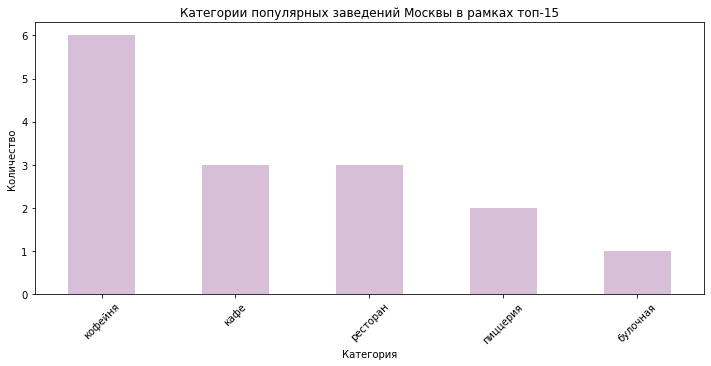

In [63]:
# Визуализируем
df_3_filtered.plot(kind='bar',
         x = 'category',
         y='count',
         title='Категории популярных заведений Москвы в рамках топ-15',
         color='thistle',
         legend=False,
         xlabel='Категория',
         ylabel='Количество',
         figsize=(12, 5),
         rot = 45)

Итак, получаем следущие выводы:
+ Первые в топе популярных заведений Москвы - **Шоколадница** (119 точек), **Домино'с пицца** (76 точек) и **Додо пицца** (74 точки)
+ У всех популярных заведений рейтинг около 4, однако лучшие оценки у **Кофемании** (4,46), **Лавки братьев Караваевых** (4,41) и у **Буханки** (4,39)
+ Самые популярные категории в рамках топ-15 - **кофейни** (40% от топа), **кафе** (20%) и **рестораны** (20%)

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


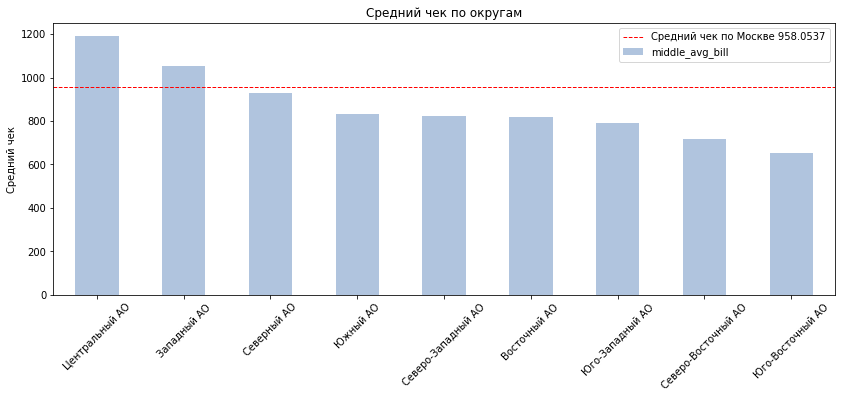

In [64]:
# Визуализируем данные среднего чека по округам
df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False).plot(kind='bar',
                                                                             title='Средний чек по округам',
                                                                             color='lightsteelblue',
                                                                             legend=False,
                                                                             xlabel='',
                                                                             ylabel='Средний чек',
                                                                             figsize=(14, 5),
                                                                             rot=45)
mean_value = df['middle_avg_bill'].mean()
plt.axhline(mean_value, color='red',
                linestyle='--', linewidth=1,
                label=f'Средний чек по Москве {round(mean_value,4)}')
plt.legend()

Из графика видно, что средний чек выше в ЦАО нежели в остальных округах, поскольку в центре Москвы цены выше. Чем дальше от центра и чем менее благополучный район (как в Юго-восточном АО - Выхино, Люблино, Кузьминки и тд хаахаха), тем ниже средний чек. Это объясняется и доходами людей, и их пожеланиями, тратами и общими ценами.

---

### Задача 9 

 При необходимости проведите исследования других данных и их взаимосвязи. Например, часы работы заведений или стоимость чашки кофе в зависимости от расположения или типа заведения.


Для понимания цен в заведениях необходимо понять средний чек в заведниях в разрезе категорий. К тому же, из тепловой карты выше можно заметить, что зависимость между этими данными хоть и не очень большая, но есть.

<AxesSubplot:title={'center':'Средний чек по категориям'}, ylabel='Средний чек'>

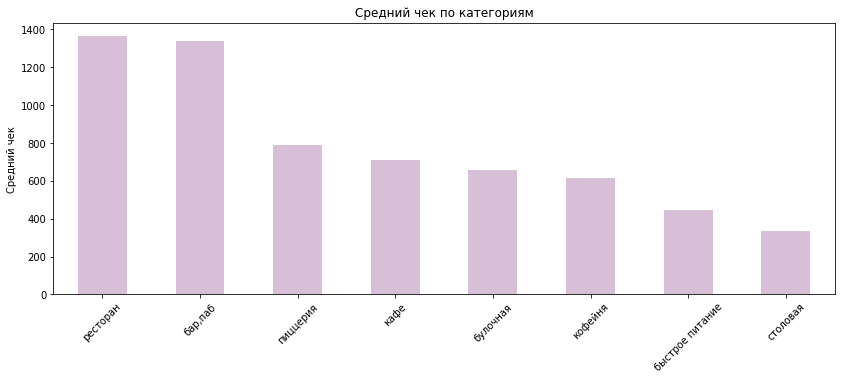

In [65]:
# Сгруппируем данные по категориям и выявим средний чек каждой категории:
df.groupby('category')['middle_avg_bill'].mean().sort_values(ascending=False).plot(kind='bar',
                                                                             title='Средний чек по категориям',
                                                                             color='thistle',
                                                                             legend=False,
                                                                             xlabel='',
                                                                             ylabel='Средний чек',
                                                                             figsize=(14, 5),
                                                                             rot=45)


Из диаграммы можно заметить, что цены выше всего в ресторанах и пабах (одним из возможных причин этого может быть и высокая цена на алкоголь, который чаще всего покупают именно в ресторанах и барах). В остальных типах заведений данные колебются от 600 до 800 рублей, не считая столовые и быстрое питание, где очевидно цены ниже.

Для оценки средней цены чашки кофе можно проанализировать зависимость стоимости кофе от типа заведения, чтобы понимать примерный диапазон цен на кофе

In [66]:
# Сгруппируем данные стоимости кофе по категориям заведений
price_for_coffee = df.groupby('category')['middle_coffee_cup'].mean().sort_values(ascending=False)
price_for_coffee = price_for_coffee.reset_index()

In [67]:
# Избавимся от пропусков
price_for_coffee['middle_coffee_cup'] = price_for_coffee['middle_coffee_cup'].fillna(0)
price_for_coffee = price_for_coffee.loc[price_for_coffee['middle_coffee_cup'] !=0]
display(price_for_coffee)

,category,middle_coffee_cup
0,"бар,паб",208.333333
1,кофейня,175.055662
2,пиццерия,153.333333
3,быстрое питание,140.000000
4,кафе,105.500000


<AxesSubplot:title={'center':'Средняя стоимость чашки кофе в разрезе категорий заведений'}, xlabel='category'>

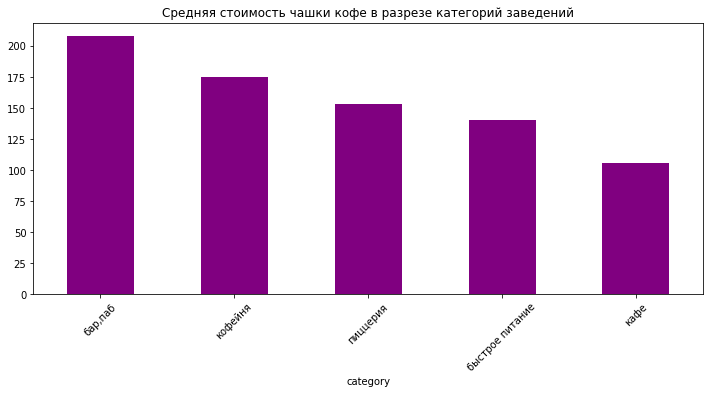

In [68]:
# Визуализируем:
price_for_coffee.plot(kind='bar',
                     x='category',
                     y='middle_coffee_cup',
                     color='purple',
                     title='Средняя стоимость чашки кофе в разрезе категорий заведений',
                     rot=45,
                     legend=False,
                     figsize=(12, 5))

В кофейнях чашка кофе стоит около 175руб, по остальным категориям данных нет (проверка ниже докажет это, выборка нерепрезентативна)

In [69]:
# Проверка (для себя)
df_copy = df
df_copy['middle_coffee_cup'] = df_copy['middle_coffee_cup'].fillna(0)
df_test = df[['category', 'middle_coffee_cup']]
df_test = df_test.loc[df_test['middle_coffee_cup'] != 0]

for value in df_test['category']:
    print(value)

кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кафе
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
пиццерия
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кафе
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофейня
кофей

---

### Промежуточный вывод 

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

Из всего анализа можно сделать следующие выводы:
+ больше всего в Москве кафе (~ 2300), ресторанов (~ 2000) и кофеен (~ 1400), причем как во всех округах, так и в Центарльном АО. Также в этих категориях больше всего посадочных мест, что говорит о большом потоке людей;
+ из всех заведений общепита около 40% заведений - несетевые;
+ рейтинг на все категории заведений в среднем около 4,5, причем оценка людей никак не зависит от других факторов;
+ средний чек по Москве больше всего в Ценатрльном (~ 1200р) и Западном АО (~ 1000о), чем дальше от центра - тем ниже прайс;
+ в ресторанах и пабах (чек ~ 1300р) цены, по сравнению со средним значением, сильно завышены. В столовых (чек ~ 335р) и фастфудах (чек ~ 445р) же средний чек значительно ниже среднего (средний чек по Москве - 950р);
+ самые популярные заведения (по количеству сетей) в Москве - кофейни.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования. 


1) В ходе работы сначала были загружены и изучены 2 таблицы - по заведениям и по среднему чеку в каждом из заведений. В процессе было обнаружено, что некоторые данные имеют не совсем корретный тип, а определенные столбцы в таблицах для лучшего понимания стоит переименовать. Для удобства оба датафрейма были объеденены в 1 единый (df), а типы данных были поправлены.

Также была проделана работа по нормализации тех же самых данных (столбцы с адресом и названиями заведений были приведены к нижнему регистру, ненужные знаки в начале и конце строк, а также задублированные пробелы убраны), в результате этого было обнаружено 4 дубликата (что не так много, всего 0.05% от общего кол-ва строк), которые были удалены.

Кроме этого, было обнаружено много пропусков (около 50% в 4 столбцах и более 90% в одном столбце, это столбцы в основном связаны с ценовыми данными), однако их обрабатывать никак не нужно, поскольку эти пропуски - попросту незаполненные людьми данные, заполнять их на средние значения некорректно, ровно как и удалять их, поэтому пропуски были оставлены, однако при дальнейшем анализе в некоторых случаях данные были отфильтрованы и убраны от пропусков для получения более наглядного результата.

2) Далее был проведен подробный исследовательский анализ, главные выводы которого следующие:
+ больше всего в Москве кафе (~ 2300), ресторанов (~ 2000) и кофеен (~ 1400), причем как во всех округах, так и в Центарльном АО. Также в этих категориях больше всего посадочных мест, что говорит о большом потоке людей;
+ из всех заведений общепита около 40% заведений - несетевые;
+ рейтинг на все категории заведений в среднем около 4,5, причем оценка людей никак не зависит от других факторов;
+ средний чек по Москве больше всего в Ценатрльном (~ 1200р) и Западном АО (~1000о), чем дальше от центра - тем ниже прайс;
+ в ресторанах и пабах (чек ~ 1300р) цены, по сравнению со средним значением, сильно завышены. В столовых (чек ~335о) и фастфудах (чек ~ 445р) же средний чек значительно ниже среднего (средний чек по Москве - 950р);
+ самые популярные заведения (по количеству сетей) в Москве - кофейни.

Эти выводы необходимы для принятие решений о месте открытия заведения, его типе, ценовой категории и в других вопросах.


3) По итогу проделанной работы и общего анализа данных можно выделить следующие рекомендации:
+ при выборе категории заведения важно учитывать и опираться на средний чек по всей Москве (который наглядно визуализирован в виде графика), чтобы цены соответствовали среднему чеку данной категории;
+ прайс в ресторанах и барах выше среднего на 35%, количество посадочных мест там также на 20% больше среднего  - это говорит о том, что открывать ресторан/паб в Москве прибыльно, люди такие заведения посещают, особенно в Центральном и Западном АО, поскольку в центре Москвы цены и потребности выше, чем в более дальних округах;
+ важно учитывать риски при открытии заведений - можно открыть в центре Москвы ресторан с высоким прайсом (где средний чек ~ 1300р), однако есть риск не справиться с конкуренцией (к примеру, в Центральном АО около 2300 заведений, из которых 650 - рестораны, конкуренция действительно сильная), поскольку в центре общепитов много (всего в Москве ~8300 заведений общепита)  и все очень разнообразные. Точно так же как при открытии небольшой булочной или пиццерии (со средним чеком 650-750р) подальше от центра есть риск низкой проходимости и неокупаемости. Данных для анализа рисков нет, поэтому сказать что более рисково, а что менее рисково возможности нет;
+ учитывая высокий средний чек в Западном АО (~ 1000р) и невысокое количество заведений в этом округе (850 объектов при среднем количестве 925), есть смысл оценить данный округ для открытия заведения


